# Machine learning with RDkit - Predict solubility 

Now that we know how to handle molecule data we will try to do a first machine learning pipeline to predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS". 


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## Preparing dataset




Download the training set from "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf".




With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen. 



In [3]:
import rdkit
from rdkit import Chem

molecule_list = Chem.SDMolSupplier('data/solubility.train.sdf', removeHs=False)


Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.



In [8]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

def calculate_descriptors(mol):
    
    descriptor_names = [ desc[0] for desc in Descriptors._descList]
    
    calculator = MolecularDescriptorCalculator(descriptor_names)
    
    return calculator.CalcDescriptors(mol)


Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.

Get alslow the sollubity with the GetProp method



In [9]:
import pandas as pd

res = []
for mol in molecule_list:
    
    res.append(calculate_descriptors(mol))

res

[(2.2118055555555554,
  1.34375,
  2.2118055555555554,
  1.34375,
  0.4687855098011332,
  72.151,
  60.05499999999999,
  72.093900384,
  32,
  0,
  -0.05383131543183678,
  -0.06538255537938412,
  0.06538255537938412,
  0.05383131543183678,
  1.0,
  1.4,
  1.4,
  13.744962415414642,
  10.279705138833732,
  1.6770337181948811,
  -1.7882347992017722,
  1.878062415414647,
  -1.5871948611662696,
  4.236962415414642,
  0.7717051388337315,
  2.19060968716425,
  7.5097750043269365,
  4.121320343559642,
  4.121320343559642,
  4.121320343559642,
  2.414213562373095,
  2.414213562373095,
  2.414213562373095,
  1.3535533905932735,
  1.3535533905932735,
  0.7071067811865474,
  0.7071067811865474,
  0.3535533905932737,
  0.3535533905932737,
  0.0,
  11.245112497836532,
  5.0,
  4.0,
  4.0,
  34.19901948541599,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  33.10993926815928,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  33.10993926815928,
  0.0,
  0.0,
  0.0,
  0

In [35]:
df = pd.DataFrame(res)
df

0         1          2         3         4        5        6    \
0      2.211806  1.343750   2.211806  1.343750  0.468786   72.151   60.055   
1      1.500000  1.500000   1.500000  1.500000  0.408362   70.135   60.055   
2      2.231806  1.355000   2.231806  1.355000  0.462954   86.178   72.066   
3      2.253472  0.898148   2.253472  0.898148  0.483890   86.178   72.066   
4      2.243056  0.541667   2.243056  0.541667  0.424482   86.178   72.066   
...         ...       ...        ...       ...       ...      ...      ...   
1020  13.185826 -1.627805  13.185826  0.003051  0.648763  444.568  408.280   
1021  12.042248 -1.044559  12.042248  0.066834  0.410290  465.631  422.287   
1022  13.125689 -2.328350  13.125689  0.037157  0.574043  385.416  362.232   
1023  13.235654 -1.605971  13.235654  0.033093  0.619599  460.611  420.291   
1024  12.263757 -2.099513  12.263757  0.078936  0.156889  665.733  618.357   

             7    8    9    ...  198  199  200  201  202  203  204  205  206  \
0      72.093900   32    0  ...    0    0    0    0    0    0    0    0    0   
1      70.078250   30    0  ...    0    0    0    0    0    0    0    0    0   
2      86.109550   38    0  ...    0    0    0    0    0    0    0    0    1   
3      86.109550   38    0  ...    0    0    0    0    0    0    0    0    0   
4      86.109550   38    0  ...    0    0    0    0    0    0    0    0    0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1020  444.251189  176    0  ...    0    0    0    0    0    0    0    0    0   
1021  465.309038  188    0  ...    0    0    0    0    0    0    0    0    0   
1022  385.152537  148    0  ...    0    0    0    0    0    0    0    0    0   
1023  460.282489  184    0  ...    0    0    0    0    0    0    0    0    0   
1024  665.304741  262    0  ...    0    0    0    0    0    0    0    0    0   

      207  
0       0  
1       0  
2       0  
3       0  
4       0  
...   ...  
1020    0  
1021    0  
1022    0  
1023    0  
1024    0  

[1025 rows x 208 columns]

For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.




In [17]:
labels = []
for mol in molecule_list:
    labels.append(mol.GetProp('SOL'))
    

In [20]:
labels

['-3.18',
 '-2.64',
 '-3.84',
 '-3.74',
 '-3.55',
 '-3.1',
 '-3.3',
 '-4.53',
 '-3.85',
 '-5.24',
 '-3.52',
 '-4.15',
 '-2.54',
 '-2.1',
 '-3.23',
 '-3.24',
 '-3.82',
 '-3.27',
 '-4.44',
 '-5.05',
 '-2.68',
 '-2.03',
 '-1.87',
 '-1.97',
 '-4',
 '-1.64',
 '-2.36',
 '-3.01',
 '-4.24',
 '-1.64',
 '-2.21',
 '-2.8',
 '-2.77',
 '-2.82',
 '-3.37',
 '-3.31',
 '-3.2',
 '-3.21',
 '-3.11',
 '-3.27',
 '-4.06',
 '-3.75',
 '-3.77',
 '-3.66',
 '-3.89',
 '-4',
 '-4.64',
 '-4.15',
 '-2.82',
 '-4.31',
 '-4.17',
 '-4.91',
 '-5.22',
 '-3.6',
 '-3.77',
 '-3.7',
 '-4.29',
 '-4.74',
 '-4.72',
 '-3.96',
 '-4.14',
 '-4.89',
 '-4.63',
 '-4.92',
 '-5.26',
 '-5.89',
 '-6.96',
 '-6.19',
 '-6',
 '-5.96',
 '-6.68',
 '-8.04',
 '-6.74',
 '-8.19',
 '-7.02',
 '-7.8',
 '-8.8',
 '-9.03',
 '-4.97',
 '-4.38',
 '-7.42',
 '-5.17',
 '-6.89',
 '-8.23',
 '-8',
 '-8.49',
 '-8.66',
 '-1',
 '-0.63',
 '-0.89',
 '-1.17',
 '-1.54',
 '-1.9',
 '-1.91',
 '-3.14',
 '-1.09',
 '-1.6',
 '-1.29',
 '-1.32',
 '-1.68',
 '-2',
 '-1.48',
 '-2.18',

Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



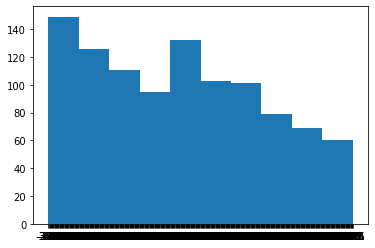

In [25]:
import matplotlib.pyplot as plt

plt.hist(labels)
plt.show()

### Feature Engineering 

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.



In [59]:
df.isna().any(1)[df.isna().any(1) == True]

985    True
dtype: bool

In [60]:
df = df.dropna()

In [62]:
labels.pop(985)

'-5.59'

In [63]:
len(labels)

1024


Apply the MinMaxScaler to the dataframe **df** to normalize the data.



In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = scaler.fit_transform(df)

In [69]:
df

array([[0.04515954, 0.91334597, 0.04515954, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.93397788, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04642841, 0.91483147, 0.04642841, ..., 0.        , 0.07692308,
        0.        ],
       ...,
       [0.73757605, 0.42846639, 0.73757605, ..., 0.        , 0.        ,
        0.        ],
       [0.74455264, 0.52385229, 0.74455264, ..., 0.        , 0.        ,
        0.        ],
       [0.68289199, 0.45868291, 0.68289199, ..., 0.        , 0.        ,
        0.        ]])

In [70]:
df.shape

(1024, 208)

Instanciate a linear regression and train it to predict the solubility from the features


Calculate the square root error for the dataset

Plot the differences between prediction and labels

### Evaluating on test set



Download test set from "https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf"


Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away



Read molecules from this file and store them in a list named **list_molecule_test**.



Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.




Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created for the training (do not fit again, only transform !!)




Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.



Calculate the mean square root error of the model for this data. Compare it to the one of training set. Does it overfit ? 

### Other models (bonus)

Try to do hyperparameter search to find better linear models (check regularisation) 



Try to test with support vector machine

Try to test with gradient boosting regressor

Try to test with a small Feedforward network